In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df=DATA

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### by obsarving data set we can say it has both numarical and catagorical data is present.
### from wich {"Survived"}column in our labal .
### by obsarving i can say it is a classification problem.

### by obsarving the data we can see it has some colums wich we dont need like {"PassengerId","Ticket} it it just unique id for evary passenger .
### and one like {"name "} column has name of passengers we can encode but it will no use for model or any visualization.

In [6]:
df=df.drop('Ticket',axis=1)

In [7]:
df=df.drop(['PassengerId','Name',],axis=1)


## now lets undarstand data mopre.

In [8]:
df.columns.to_frame()

,0
Survived,Survived
Pclass,Pclass
Sex,Sex
Age,Age
SibSp,SibSp
Parch,Parch
Fare,Fare
Cabin,Cabin
Embarked,Embarked


In [9]:
print('rows in data=',df.shape[0])
print('columns in data=',df.shape[1])

rows in data= 891
columns in data= 9


### there are 8 independent variable and 1 dependent variable (label),and total number of rows are 891

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

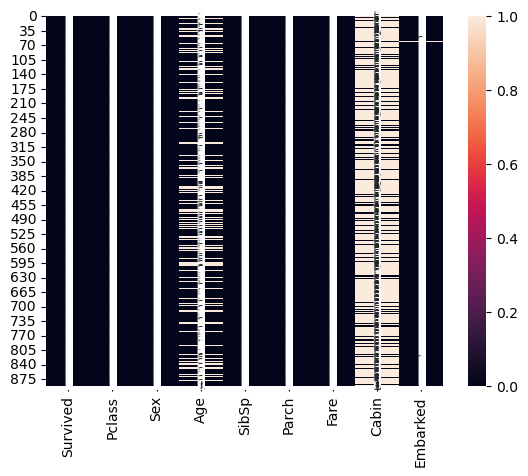

In [11]:
sns.heatmap(df.isna(),color='white',annot=True)

### as seen in heatmap we have three columns wich have null values {'age','cabin','Embarked'}
### we can fill it with fillna method but column 'cabin' has null value more then 50% that is why we have to drop it 
### it can affact on parformance of th emodel.

In [12]:
df=df.drop('Cabin',axis=1)

In [13]:
df['Age'].mean()
df['Age'].fillna(29,inplace=True)

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
df['Embarked'].fillna('S',inplace=True)

In [17]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### problem of null value has been resolve.

In [18]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

<Axes: >

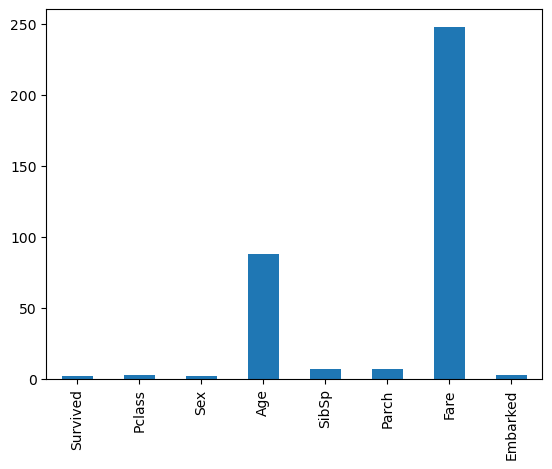

In [19]:
df.nunique().plot(kind='bar')

### sa seen in above plot fare column has the highest unique value 

In [20]:
for i in df.columns:
    print(df[i].value_counts())
    print('/n'*45)

0    549
1    342
Name: Survived, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
3    491
1    216
2    184
Name: Pclass, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
male      577
female    314
Name: Sex, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
29.00    197
24.00     30
22.00     27
18.00     26
30.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/n/

### all unique values as par respected columns

In [21]:
df['Age'].value_counts().sum()

891

In [22]:
DATA.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### heare are some obsarvation 
#### 1) deffranse between mean and median(50%) is not equal that mens sqewness is present
#### 2) and columns like 'Survived','SibSp','Parch' has median equal to 0 that mens class embalese is present in those columns
#### 3) and also thare are columns like 'age','sibsp','parch'and'fare' has very big deffrense in 75% and max value that mens some outliers are also present .

In [35]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.466268
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

## lets try to see the class embalene with univariate anlysis.

<Axes: xlabel='Survived', ylabel='count'>

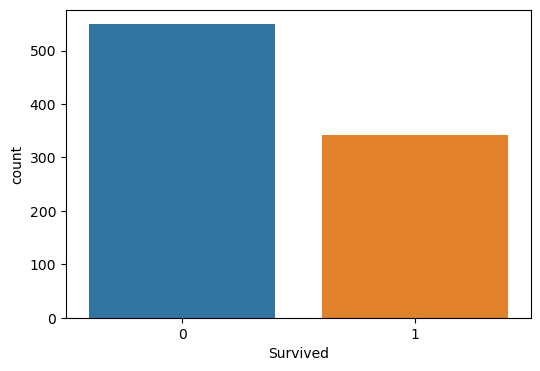

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived',data=df)

### as seen in the above plot thare is class-imbalce but it is not so high.

<Axes: xlabel='SibSp', ylabel='count'>

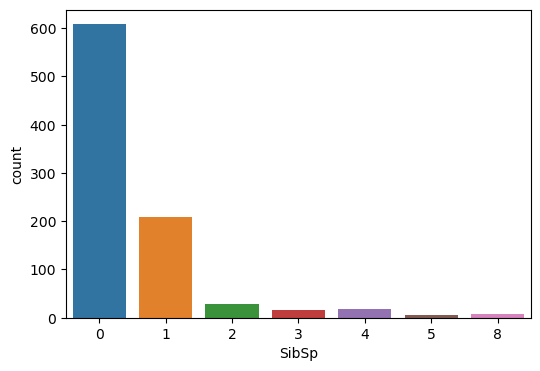

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='SibSp',data=df)

<Axes: xlabel='Parch', ylabel='count'>

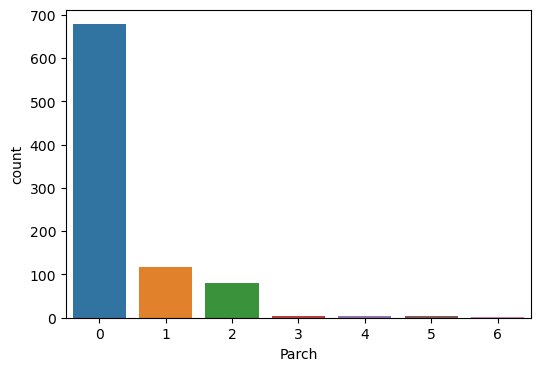

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Parch',data=df)

# bivariate anlysis

Text(0.5, 1.0, 'relation of age and fare')

<Figure size 600x400 with 0 Axes>

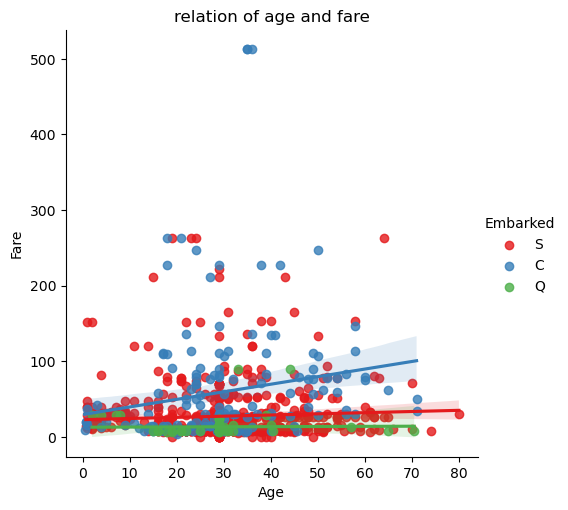

In [26]:
plt.figure(figsize=(6,4))
sns.lmplot(x='Age',y='Fare',hue='Embarked',data=df,palette='Set1')
plt.title('relation of age and fare')

Text(0.5, 1.0, 'relation of age and Survived')

<Figure size 600x400 with 0 Axes>

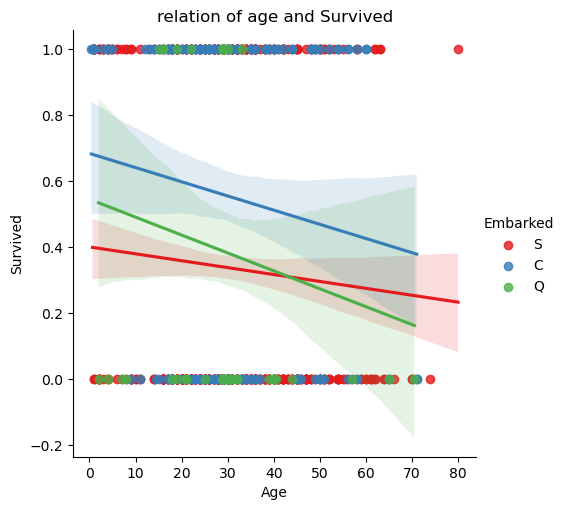

In [27]:
plt.figure(figsize=(6,4))
sns.lmplot(x='Age',y='Survived',hue='Embarked',data=df,palette='Set1')
plt.title('relation of age and Survived')

Text(0.5, 1.0, 'relation of Pclass and Survived')

<Figure size 600x400 with 0 Axes>

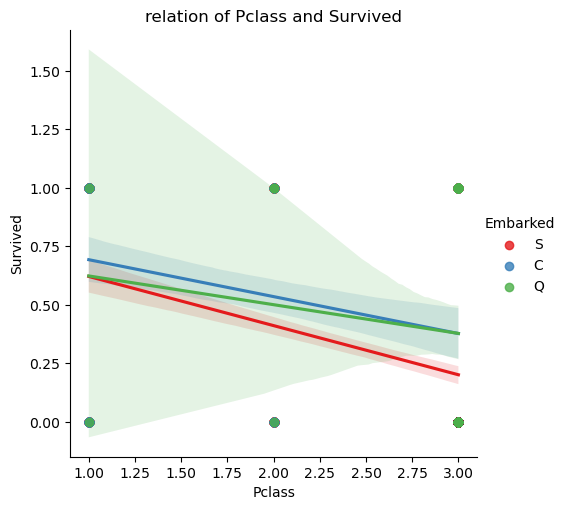

In [28]:
plt.figure(figsize=(6,4))
sns.lmplot(x='Pclass',y='Survived',hue='Embarked',data=df,palette='Set1')
plt.title('relation of Pclass and Survived')

Text(0.5, 1.0, 'relation of Fare and Survived')

<Figure size 600x400 with 0 Axes>

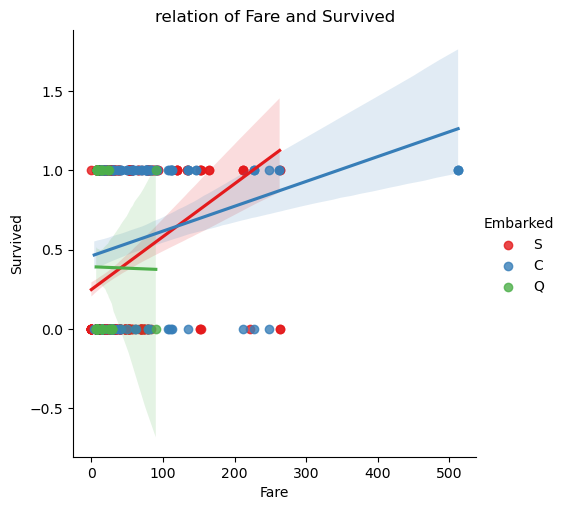

In [29]:
plt.figure(figsize=(6,4))
sns.lmplot(x='Fare',y='Survived',hue='Embarked',data=df,palette='Set1')
plt.title('relation of Fare and Survived')

## multivariate anlysis

<Axes: >

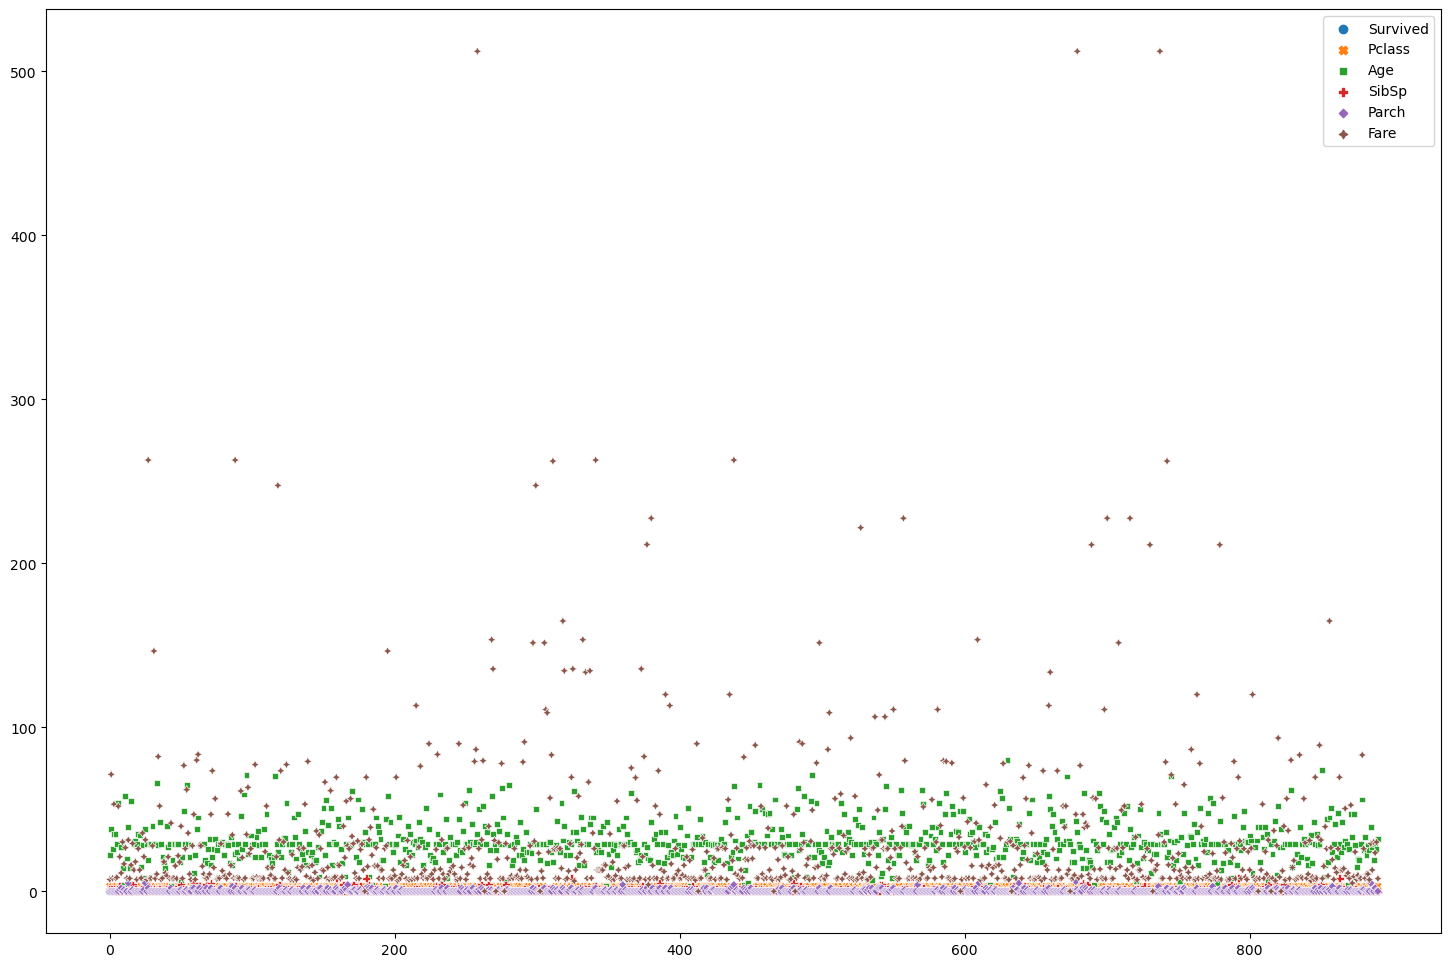

In [32]:
plt.figure(figsize=(18,12))
sns.scatterplot(df)

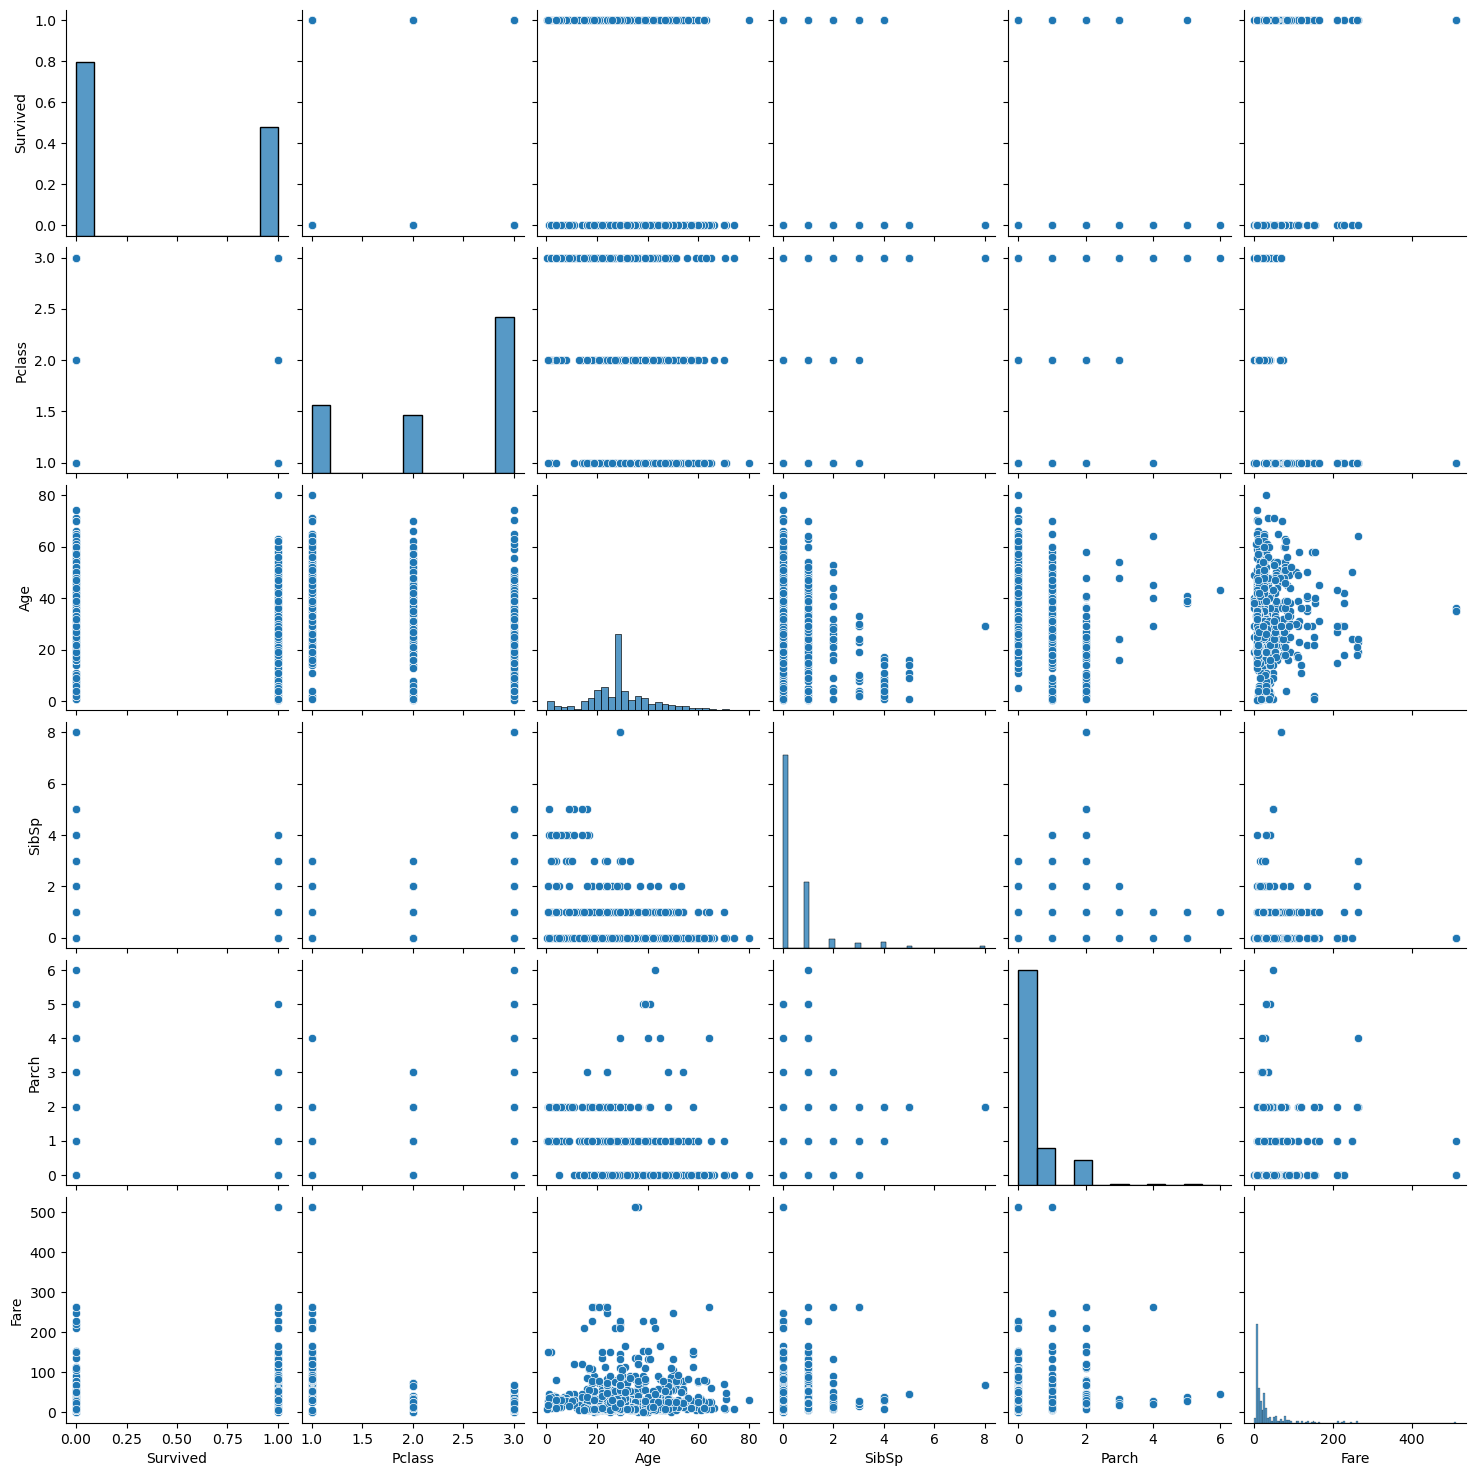

In [34]:
sns.pairplot(df)

# lets chek the distribution of data in every column

Survived    0.478523
Pclass     -0.630548
Age         0.466268
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

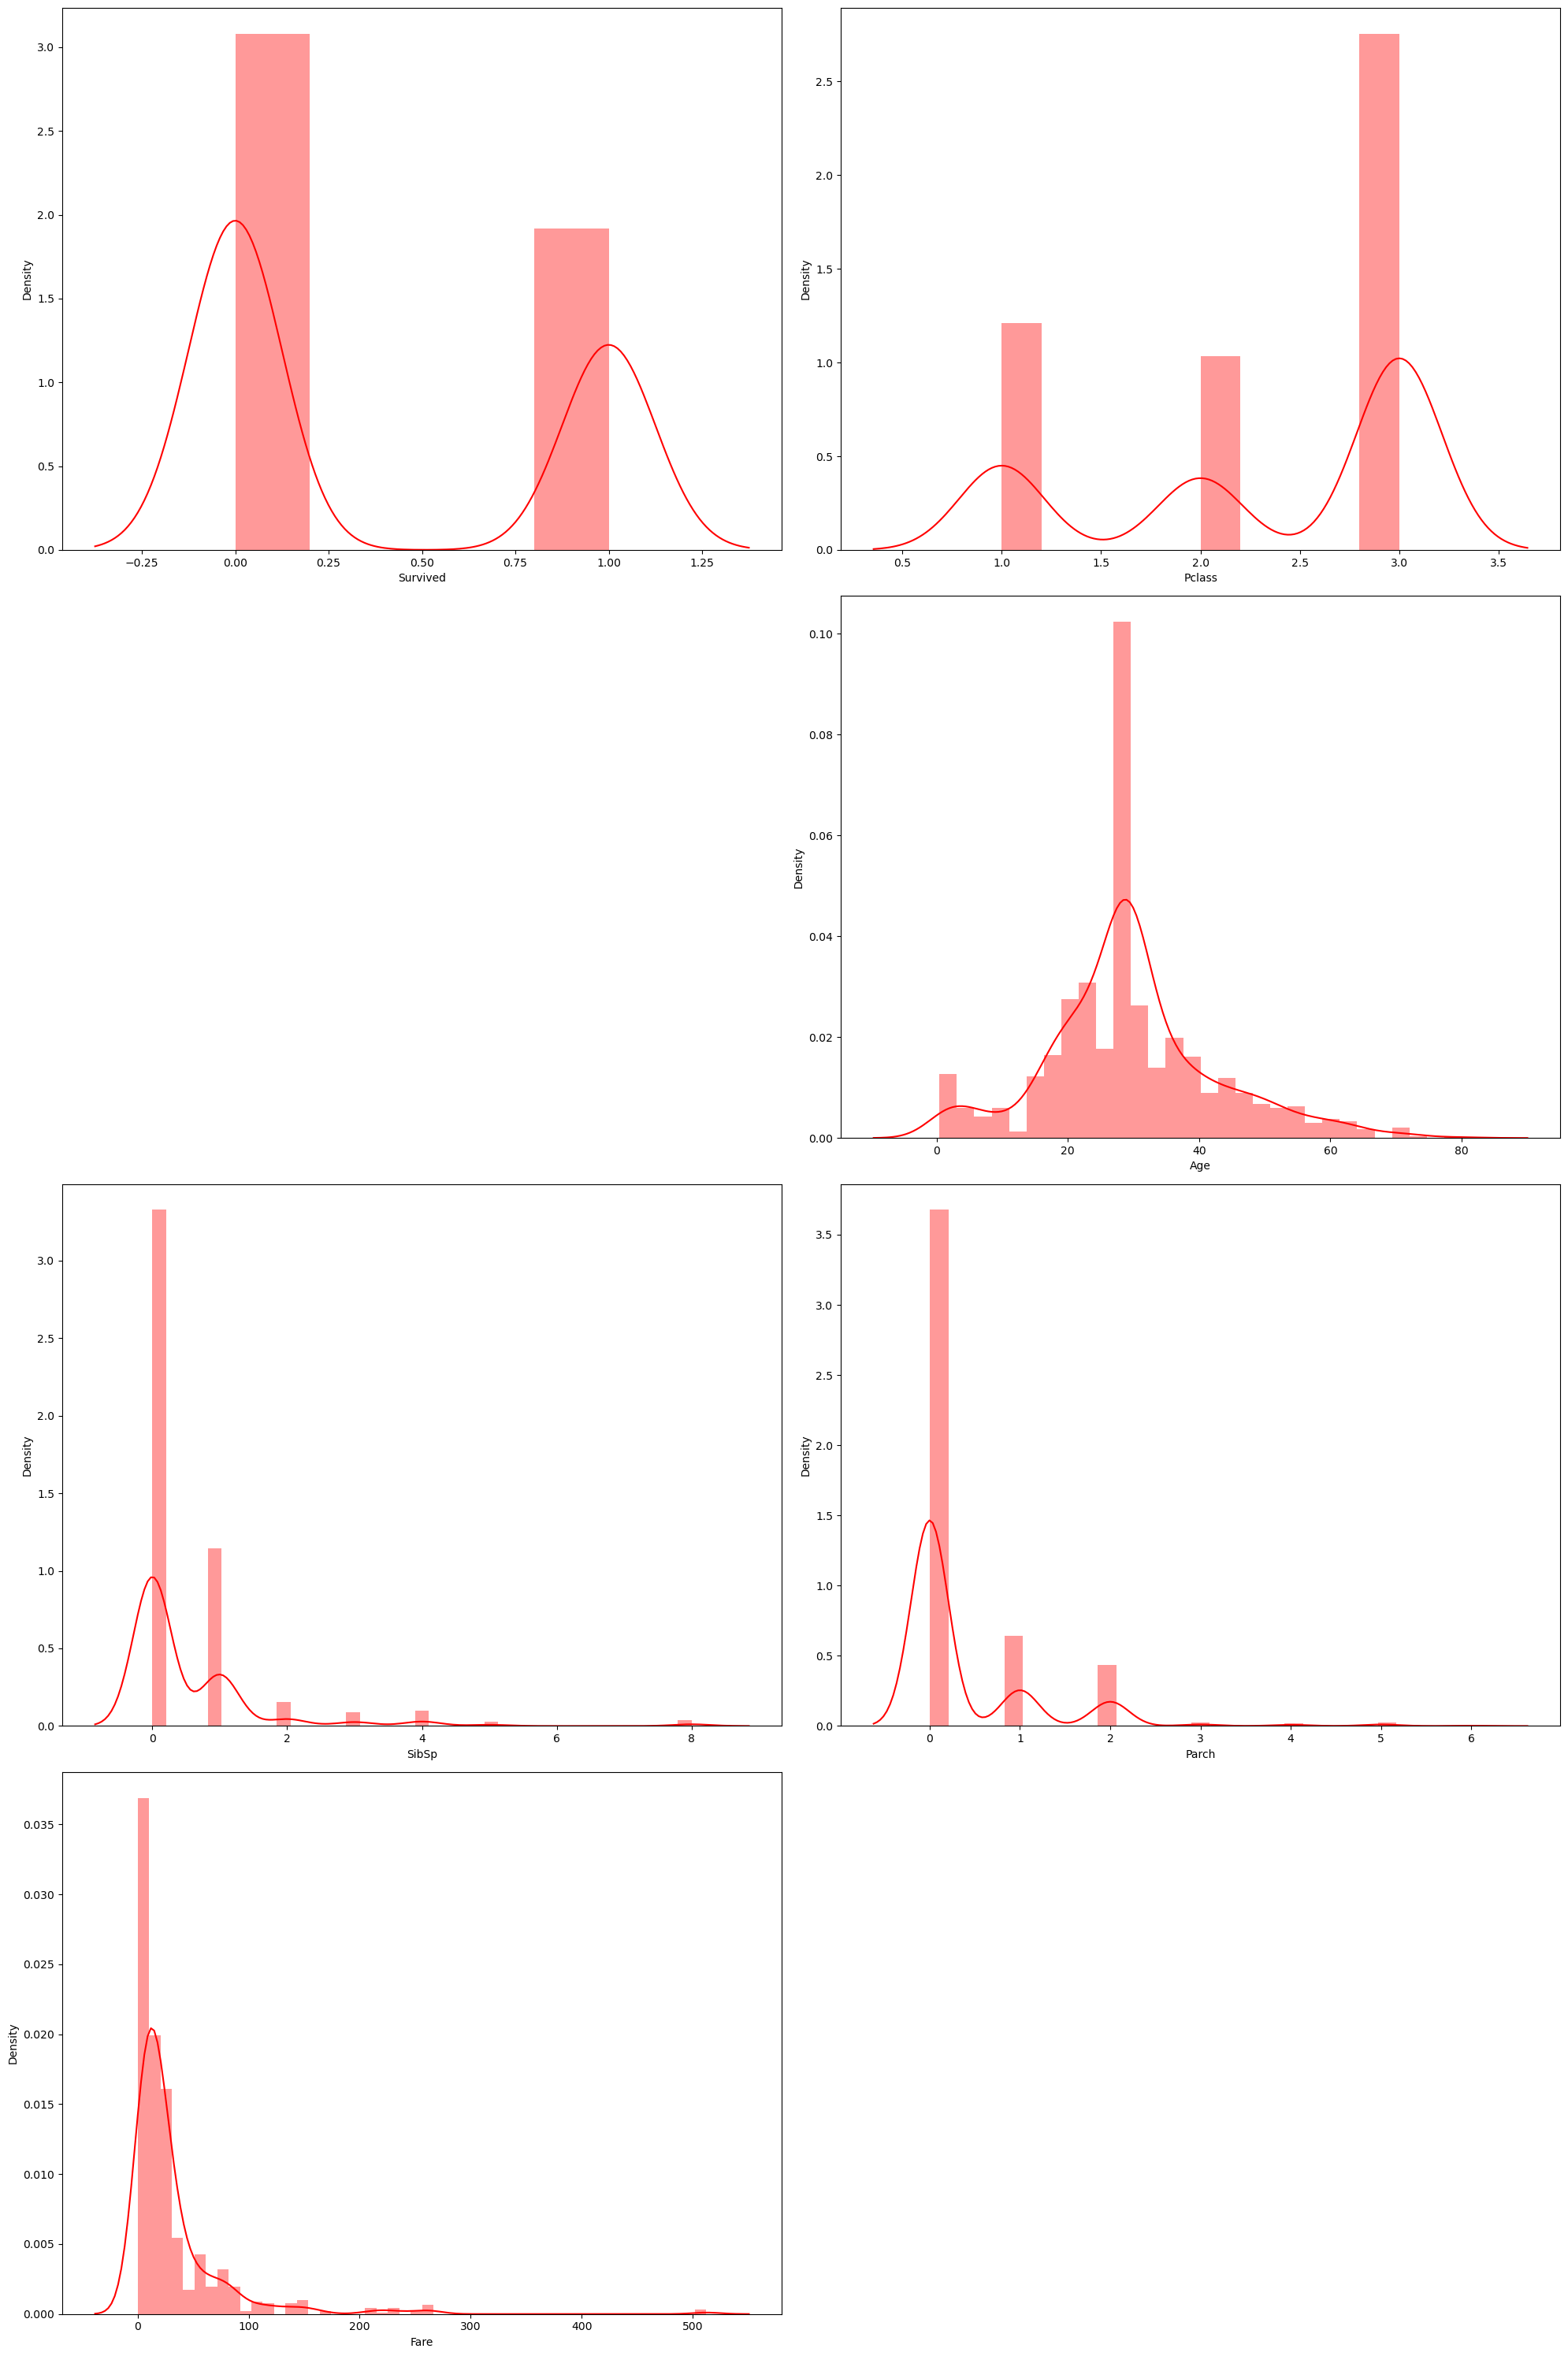

In [38]:

plt.figure(figsize=(20,30))
plot_v=1
for col in df:
    if plot_v <=9:
        if df.dtypes[col] == 'int64'or df.dtypes[col] == 'float64':
            p=plt.subplot(4,2,plot_v)
            sns.distplot(df[col],color='red')
            plt.xlabel(col,fontsize=10)
            plt.yticks(rotation=0,fontsize=10)
    plot_v+=1
plt.tight_layout() 
df.skew()

### as seen in plot we have {SibSp,Parch ,Fare}colums wich are have very high skewnwss 
### but we are not going to fix {SibSp,Parch} becose thy are cetagorical columns.

## lets chek the outliersin box plot

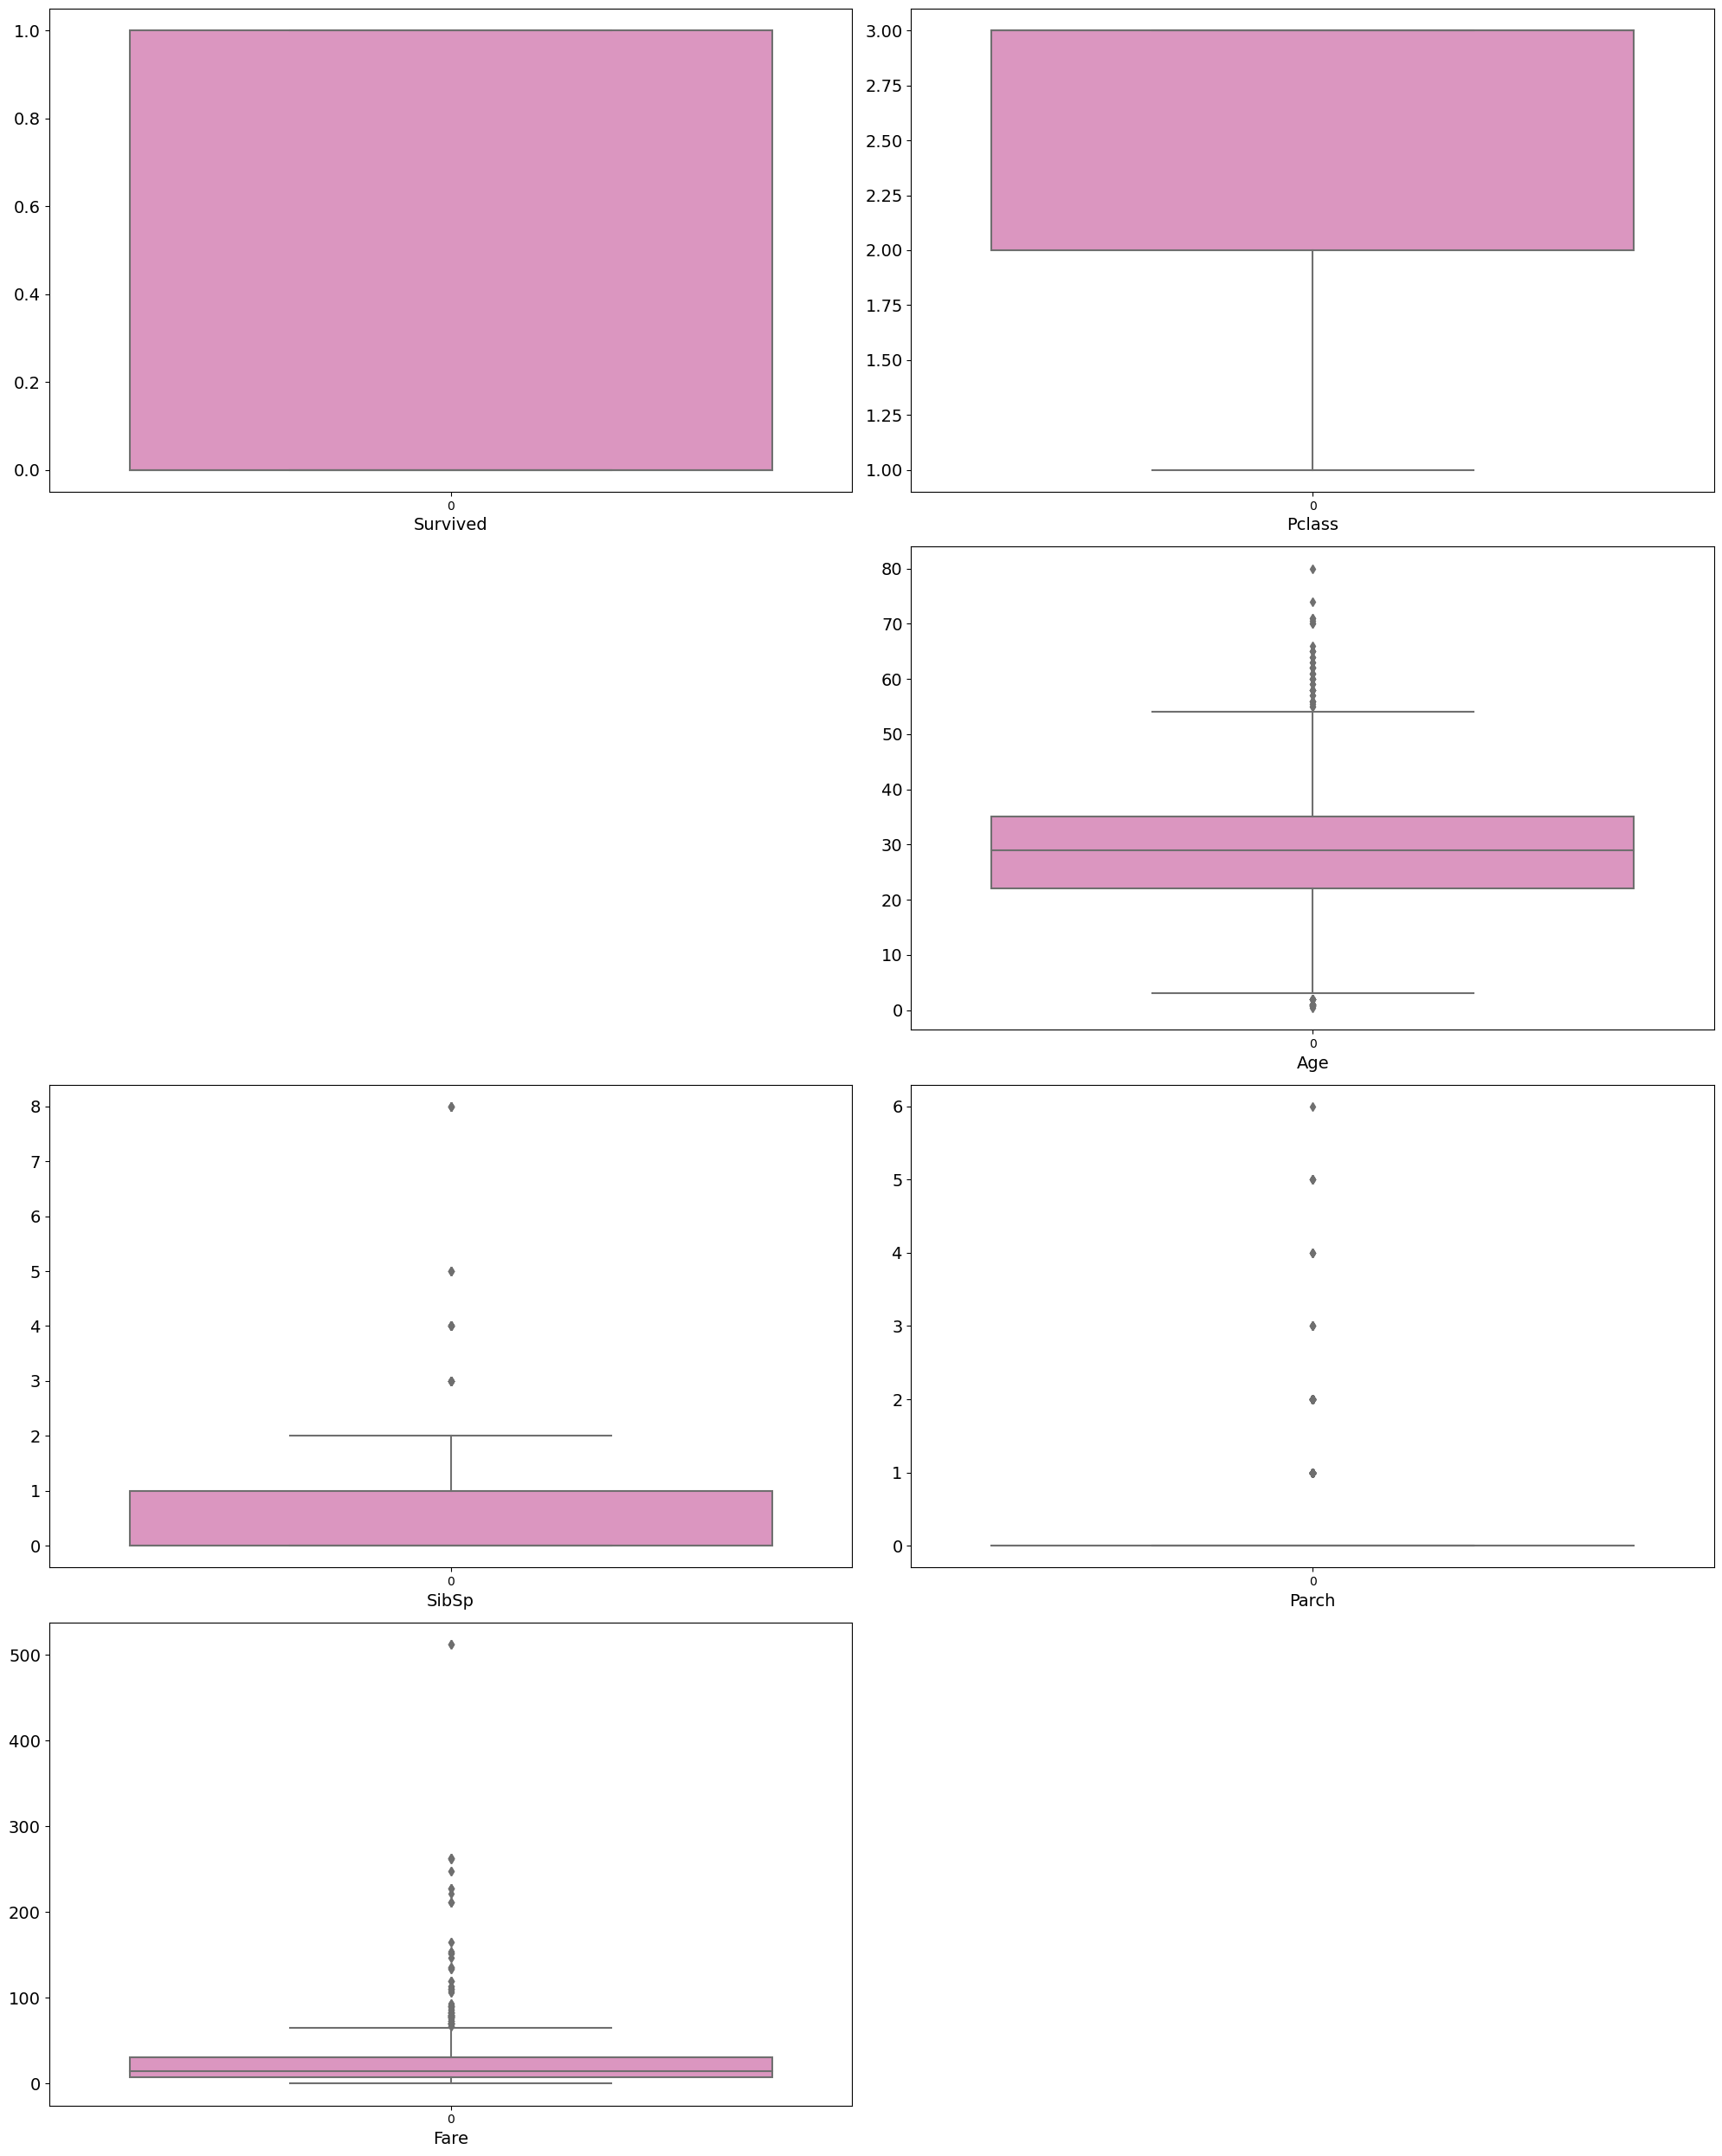

In [42]:
plt.figure(figsize=(20,25))
value=1
for col in df:
    if value <=8:
        if df.dtypes[col] == 'int64'or df.dtypes[col] == 'float64':
            g=plt.subplot(4,2,value)
            sns.boxplot(df[col],palette="Set2_r")
            plt.xlabel(col,fontsize=14)
            plt.yticks(rotation=0,fontsize=14)
    value+=1
plt.tight_layout()

## lets se outlies in detail

In [43]:
from scipy import stats
from scipy.stats import zscore

In [44]:
out_columns=df[['Fare']]
z_scor=np.abs(zscore(out_columns))

In [60]:
np.where(z_scor>2.5)

(array([ 27,  88, 118, 258, 299, 311, 318, 341, 377, 380, 438, 527, 557,
        679, 689, 700, 716, 730, 737, 742, 779, 856], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [53]:
df.iloc[679]

Survived           1
Pclass             1
Sex             male
Age             36.0
SibSp              0
Parch              1
Fare        512.3292
Embarked           C
Name: 679, dtype: object

In [61]:
df1=df[(z_scor<2.5).all(axis=1)]

<Axes: >

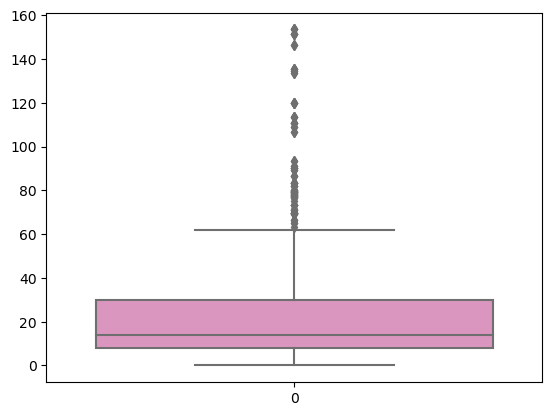

In [62]:
sns.boxplot(df1['Fare'],palette="Set2_r")

### we can not remove all outliers becouse its to much of our data.

In [63]:
df1.skew()

Survived    0.516656
Pclass     -0.703868
Age         0.461019
SibSp       3.762908
Parch       2.869256
Fare        2.205519
dtype: float64

In [65]:
df1['Fare']=np.cbrt(df1['Fare'])

In [66]:
df1.skew()

Survived    0.516656
Pclass     -0.703868
Age         0.461019
SibSp       3.762908
Parch       2.869256
Fare        0.588806
dtype: float64

<Axes: xlabel='Fare', ylabel='Density'>

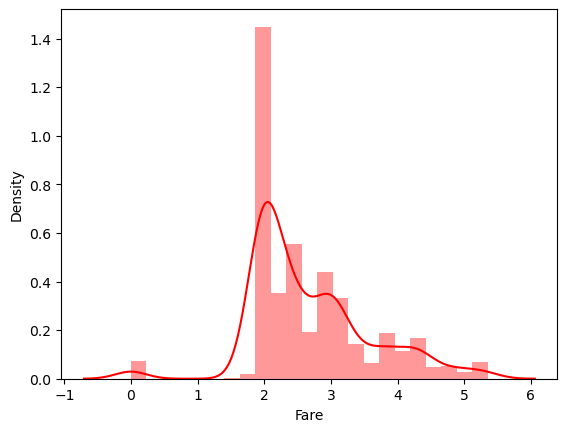

In [69]:
sns.distplot(df1['Fare'],color='red')

### let chek if data has any multicolinearty issue.

In [70]:
df1.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.326075,-0.072125,-0.040586,0.076530,0.315441
Pclass,-0.326075,1.000000,-0.343074,0.094576,0.056845,-0.643955
Age,-0.072125,-0.343074,1.000000,-0.231000,-0.191781,0.113606
SibSp,-0.040586,0.094576,-0.231000,1.000000,0.411349,0.324196
Parch,0.076530,0.056845,-0.191781,0.411349,1.000000,0.290383
Fare,0.315441,-0.643955,0.113606,0.324196,0.290383,1.000000


### lets plot a heatmap for clear obsarvation

<Axes: >

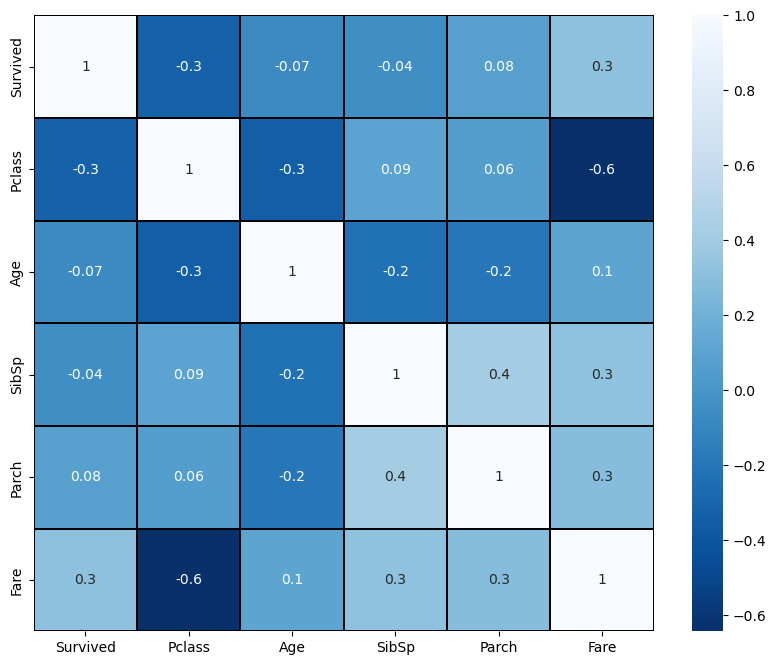

In [71]:
cor=df1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,linewidths=0.1,fmt='.1g',linecolor='black',annot= True,cmap='Blues_r')

### by obsarving the above heatmap we can the the pclass and fare are highly corelated with each othar 
### othar columns are also correlated but not highly.

## we are not droping any colums 

### lets encode the Region column for model building with labal encoder

In [72]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  869 non-null    int64  
 1   Pclass    869 non-null    int64  
 2   Sex       869 non-null    object 
 3   Age       869 non-null    float64
 4   SibSp     869 non-null    int64  
 5   Parch     869 non-null    int64  
 6   Fare      869 non-null    float64
 7   Embarked  869 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 93.4+ KB


In [74]:
df1['Sex']=label_encoder.fit_transform(df1['Sex'])
df1['Embarked']=label_encoder.fit_transform(df1['Embarked'])

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  869 non-null    int64  
 1   Pclass    869 non-null    int64  
 2   Sex       869 non-null    int32  
 3   Age       869 non-null    float64
 4   SibSp     869 non-null    int64  
 5   Parch     869 non-null    int64  
 6   Fare      869 non-null    float64
 7   Embarked  869 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 86.6 KB


### all object data converted into int dtype.

### lets split the label and independent variable

In [76]:
dfx=df1.drop('Survived', axis=1)
dfy=df1['Survived']

In [77]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    869 non-null    int64  
 1   Sex       869 non-null    int32  
 2   Age       869 non-null    float64
 3   SibSp     869 non-null    int64  
 4   Parch     869 non-null    int64  
 5   Fare      869 non-null    float64
 6   Embarked  869 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 79.8 KB


In [78]:
dfy.info()

<class 'pandas.core.series.Series'>
Int64Index: 869 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
869 non-null    int64
dtypes: int64(1)
memory usage: 45.9 KB


### lets scal the independent variables with standard scaler

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scal=StandardScaler()
dfx=pd.DataFrame(scal.fit_transform(dfx),columns=dfx.columns)

In [81]:
dfx.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,8.690000e+02,8.690000e+02,8.690000e+02,8.690000e+02,8.690000e+02,8.690000e+02,8.690000e+02
mean,-3.679450e-17,8.176556e-18,1.062952e-16,-6.541245e-17,4.292692e-17,4.905934e-17,-1.267366e-16
std,1.000576e+00,1.000576e+00,1.000576e+00,1.000576e+00,1.000576e+00,1.000576e+00,1.000576e+00
min,-1.637460e+00,-1.377195e+00,-2.233540e+00,-4.699827e-01,-4.599821e-01,-2.939926e+00,-1.993661e+00
25%,-4.170888e-01,-1.377195e+00,-5.765535e-01,-4.699827e-01,-4.599821e-01,-7.509865e-01,-7.093827e-01
50%,8.032821e-01,7.261135e-01,-3.906943e-02,-4.699827e-01,-4.599821e-01,-2.995141e-01,5.748955e-01
75%,8.032821e-01,7.261135e-01,4.216312e-01,4.376061e-01,-4.599821e-01,4.757404e-01,5.748955e-01
max,8.032821e-01,7.261135e-01,3.876886e+00,6.790727e+00,7.129722e+00,2.945381e+00,5.748955e-01


#### lets import all the libreries for models

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

### first lets get a best rendom stete value .

In [84]:
MAXXACU=0
MAXRS=0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.30,random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred=dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MAXXACU:
        MAXXACU=acc
        MAXRS=i
print('MAX accuracy is',MAXXACU,'BEST rendom state is',MAXRS)    

MAX accuracy is 0.8237547892720306 BEST rendom state is 150


In [85]:
x_train,x_test,y_train,y_test=train_test_split(dfx,dfy,test_size=0.30,random_state=MAXRS)

### now we have the best randoom state value "167" 
### we will use this value to build models

##### defing the all evaluation method to one

In [89]:
def evaluation(model, prediction, x_train, y_train, x_test, y_test):
    print(accuracy_score(y_test,prediction))
    print(confusion_matrix(y_test,prediction))
    print(classification_report(y_test,prediction))

### making all modal as a singal modal

In [87]:
models = {
    'LogisticRegression'         : LogisticRegression(),
    'DecisionTreeClassifier'     : DecisionTreeClassifier(),
    'RandomForestClassifier'     : RandomForestClassifier(),
    'SVC'                        : SVC(),
    'KNeighborsClassifier'       : KNeighborsClassifier(),
    'GaussianNB'                 : GaussianNB(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'MLPClassifier'              :MLPClassifier()
}

## now lets train all modal at once,

In [92]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    prediction1 = model.predict(x_test)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, x_train, y_train, x_test, y_test), 
          '\n')

Model: LogisticRegression
0.8045977011494253
[[135  22]
 [ 29  75]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.77      0.72      0.75       104

    accuracy                           0.80       261
   macro avg       0.80      0.79      0.79       261
weighted avg       0.80      0.80      0.80       261

None 

Model: DecisionTreeClassifier
0.8237547892720306
[[142  15]
 [ 31  73]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       157
           1       0.83      0.70      0.76       104

    accuracy                           0.82       261
   macro avg       0.83      0.80      0.81       261
weighted avg       0.82      0.82      0.82       261

None 

Model: RandomForestClassifier
0.8275862068965517
[[146  11]
 [ 34  70]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       157
           

## ALL MODEL SCORE:
## 'LogisticRegression'         : 0.8045977011494253
##    'DecisionTreeClassifier'     : 0.8237547892720306
##   'RandomForestClassifier'     : 0.8275862068965517
##    'SVC'                        : 0.8352490421455939
##    'KNeighborsClassifier'       : 0.8084291187739464
##    'GaussianNB'                 : 0.7777777777777778
##    'GradientBoostingClassifier' : 0.842911877394636
##   'MLPClassifier'              :0.8275862068965517

### lets cross validate all models with cross_val_score method

In [96]:
for model_name, model in models.items():
    score=cross_val_score(model,dfx,dfy,cv=8,)
    print('Model: {}'.format(model_name))
    print(score)
    print(model.score(x_test, y_test))
    print(score.mean())
    print("                                                                                  ")
    print('deffrence between accuracy_score and cross val_score',(model.score(x_test, y_test)) -(score.mean()))
    print("                                                                                  ")


Model: LogisticRegression
[0.78899083 0.78899083 0.80733945 0.77981651 0.79816514 0.76851852
 0.78703704 0.82407407]
0.8045977011494253
0.792866547740401
                                                                                  
deffrence between accuracy_score and cross val_score 0.011731153409024309
                                                                                  
Model: DecisionTreeClassifier
[0.77981651 0.73394495 0.77981651 0.79816514 0.77981651 0.83333333
 0.7962963  0.85185185]
0.8237547892720306
0.7941301393136255
                                                                                  
deffrence between accuracy_score and cross val_score 0.02962464995840508
                                                                                  
Model: RandomForestClassifier
[0.77981651 0.7706422  0.80733945 0.86238532 0.8440367  0.80555556
 0.80555556 0.87037037]
0.8275862068965517
0.8182127081209651
                                                 

# the GradientBoostingClassifier model is best model for oour data

#### now lets use hyper parameter tuning on our best model

In [97]:
parameters={
     'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
            }

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [100]:
GCV.best_params_

{'learning_rate': 0.01,
 'max_depth': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [102]:
final_model=GradientBoostingClassifier(n_estimators=100 ,learning_rate=0.01 ,max_depth=5,min_samples_split=5)
final_model.fit(x_train,y_train)
predf=final_model.predict(x_test)
accuracy=accuracy_score(y_test,predf)
accuracy*100

82.75862068965517

### SCORE is reduse by 2% 

### lets chek the ROC curve

In [103]:
from sklearn import metrics

In [104]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,predf)
roc_auc=metrics.auc(fpr,tpr)

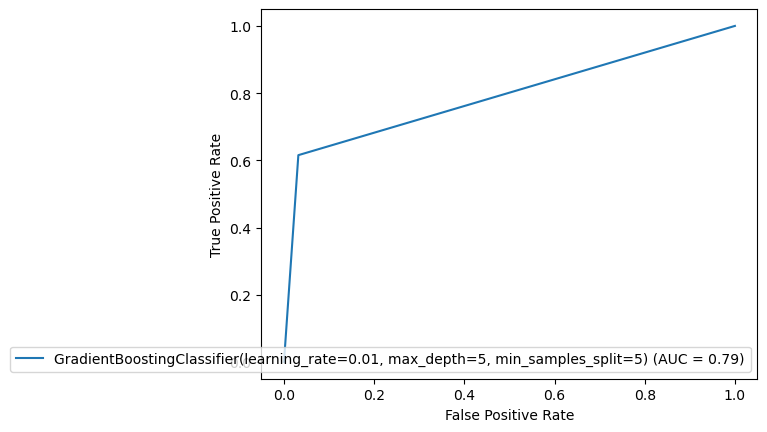

In [105]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

### as seen the auc value is 70%

### lets save the modal

In [106]:
import joblib

In [107]:
joblib.dump(final_model," Titanic survived Project")

[' Titanic survived Project']